# Data Science and Visualization (RUC F2023)

## Miniproject Report

## Remarks:

1. This template serves as a guideline for structuring your miniproject report. You're supposed to follow the provided sections overall, but you're allowed to make changes or adjustments whenever it's appropriate for your particular project. 

    * For example, in each section provided below, you may use many cells instead of just one. 

    * You may also add subsections if you want. If necessary, you can also add or remove sections.


2. You should rename this notebook file to 'Group_xxx_report.ipynb' where 'xxx' is your group number in our [padlet] (https://padlet.com/luhua/dsv-f23-mini-project-group-formation-sgw8mxkajzhh0tli). This notebook should be submitted to Digital Exam in time.

3. Make sure the data you use is available somewhere and accessible to the examiner and censor. You may upload your data together with this report to Digital Exam, or put it online and provide the URL to it in this report. It's your own responsibility to ensure the data accessibility. 

4. Any text in '[ ]' throughout the template should be replaced by appropriate content that you're supposed to generate. Also remember to remove the pairs of '[' and ']' in the final report. 

5. Give sufficient descriptive and explanative information by using Markdown cells and/or comments in Python code.

6. Remove this cell in the final report.

7. If you have questions, please email to luhua@ruc.dk.

## Project Title: [Decide a good title for your project and write it here]

## Group Members:
* [Mathias, computer science and informatics, 3rd, mamaar@ruc.dk]
* [name_2, study, year, email_2]
* [Add more if needed]

## Abstract

[Here, you need to write ~5 sentences to describe the main points of your project, including but not limited to, dataset, research questions, data science methods, findings from the data, your condlusions and remarks.]

## 0. Setup and Data

Import the modules needed for the project.

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Data description:

[Here you should provide a description of your dataset and where to find the dataset.]

## 1. Loading the Data

[Below you should load the data, display a part of the data, show the shape (number of rows and that of columns) of the data, and show the statistics of the data.]

In [65]:
df = pd.read_csv("data/bubblesort-PC16.csv") #dummy data
df.columns=["Test name","PKG (J)","CPU (J)","Memory (byte)","Temperature","Time (ms)"]
df.head()

,Test name,PKG (J),CPU (J),Memory (byte),Temperature,Time (ms)
0,random2-25000-1,15.660828,13.801025,,,2133.24
1,random3-25000-1,15.820557,13.970337,,,2144.08
2,random4-25000-1,17.963196,15.886780,,,2407.42
3,random5-25000-1,17.389160,15.399658,,,2381.58
4,random6-25000-1,17.897888,15.836975,,,2424.54


## 2. Data Preprocessing

[Below you should handle the missing values, convert data types, apply data scaling and so on, if any of them is needed.]

In [223]:
#removing values that are nonsense 
df = df[df['PKG (J)'] >= 0]
df = df[df['CPU (J)'] >= 0]
#df = df[df['Memory (byte)'] >= 0]
#df = df[df['Temperature'] >= 0]
df = df[df['Time (ms)'] >= 0]

df = df.replace("  ", np.nan)


#missing values for each column
df.isnull().sum(axis=0)


Test name         0
PKG (J)           0
CPU (J)           0
Memory (byte)    74
Temperature      74
Time (ms)         0
dtype: int64

In [182]:
#random input seperated into a list, where each element is a DataFrame containing that random CSVs output
listOfRandoms = []
for randIndex in range(0,11):
    listOfRandoms.append(df[df["Test name"].str.startswith(f"random{randIndex}-")])


# Dataframe containing results for the best case input 
dfBest = df[df["Test name"].str.startswith("best")]
# Dataframe containing results for the worst case input 
dfWorst = df[df["Test name"].str.startswith("worst")]

C:\Users\mathi\AppData\Local\Temp\ipykernel_15168\2461633448.py:3: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  dfRandom = pd.Series()


In [188]:
dfBest

,Test name,PKG (J),CPU (J),Memory (byte),Temperature,Time (ms)
58,best-25000-1,8.375916,6.896790,NaN,NaN,1454.82
59,best-50000-1,12.358948,10.305115,NaN,NaN,2103.92
60,best-75000-1,19.475464,16.655029,NaN,NaN,3272.38
61,best-100000-1,27.459290,23.829163,NaN,NaN,4550.81
62,best-200000-1,68.809387,60.602539,NaN,NaN,10998.90
63,best-300000-1,142.240906,125.971497,NaN,NaN,22701.60
64,best-400000-1,247.800110,218.949036,NaN,NaN,39311.90
65,best-500000-1,390.421997,342.826660,NaN,NaN,60670.10


## 3. Exploratory Data Analysis

[Below you can conduct EDA of your data, e.g., ask some questions and try to answer them by accessing the data properly and making some visualizations.]

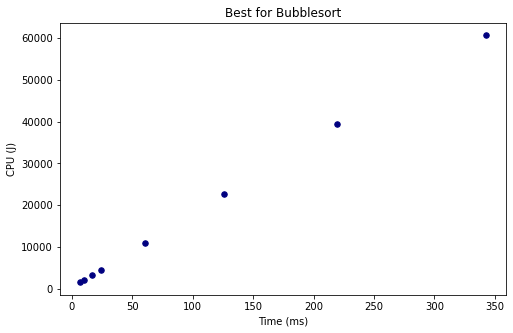

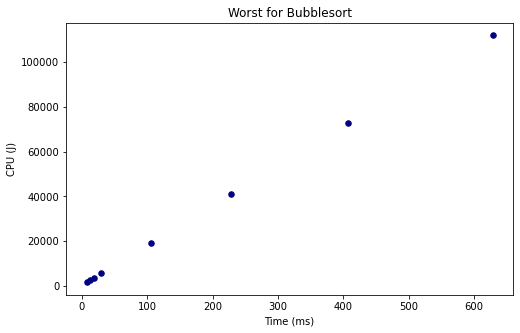

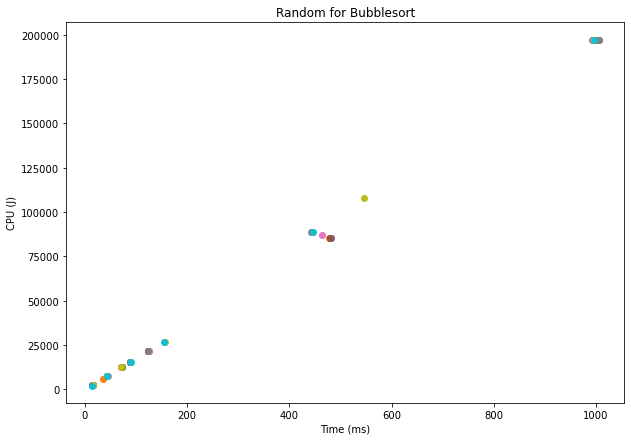

In [222]:
plt.figure(figsize=(10, 7))
x = dfBest["Time (ms)"]
y = dfBest["CPU (J)"]
plt.scatter(y,x, color='navy', s=30, marker='o', label="Best")
plt.title("Best for Bubblesort")
plt.xlabel("Time (ms)")
plt.ylabel("CPU (J)")
plt.show()

plt.figure(figsize=(10, 7))
x = dfWorst["Time (ms)"]
y = dfWorst["CPU (J)"]
plt.scatter(y,x, color='navy', s=30, marker='o', label="Best")
plt.title("Worst for Bubblesort")
plt.xlabel("Time (ms)")
plt.ylabel("CPU (J)")
plt.show()

plt.figure(figsize=(10, 7))
for i in range(10):
    plt.plot(listOfRandoms[i]["CPU (J)"],listOfRandoms[i]["Time (ms)"],'o', label=f"random{i}")
plt.title("Random for Bubblesort")
plt.xlabel("Time (ms)")
plt.ylabel("CPU (J)")
plt.show()

## 4. Data Modelling

[Below you apply machine learning models and other data science methods to your data, e.g., classification, regression, clustering, and association rule mining. You should do at least one of them. Give a description of what you do here.]

### 4.1. Feature Selection

[Decide which features you want to use and obtain them properly from the original data.]

### 4.2 Model Construction and Validation

[Construct the model and validate the model design if necessary.]

### 4.3 Model Application and Performance Evaluation

[Apply the model and evaluate its performance]

### 4.4 Visualize and Analyze Your Results/Findings from Data Modelling

[Here you may visualize the modeling results, and/or analyze/interprete its meanings.]

## 5. Conclusion and Discussion

[Here you may draw your conclusion based on the previous sections, and discuss the pros and cons of the project, and propose something for future work.]